## Análisis Nacidos Vivos Registrados 2018

---
## RECOLECCIÓN Y PREPARACIÓN DE DATOS

In [1]:
# Carga de librerías
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carga de datos
df = pd.read_csv('src/nacidos-vivos-registrados-2018_deis.csv')

---
## ANÁLISIS EXPLORATORIO

In [3]:
df.head()

,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,tipo_de_parto_id,tipo_de_parto_nombre,sexo,sexo_nombre,edad_de_la_madre_grupos_id,edad_de_la_madre_grupos_nombre,semanas_de_gestacion_id,semanas_de_gestacion_nombre,instruccion_de_la_madre_id,instruccion_de_la_madre_nombre,Intervalos_de_peso_al_nacer_id,intervalos_de_peso_al_nacer_nombre,cantidad_nacimientos
0,34,Formosa,1,Simple,2,Mujer,4,25 a 29,5,32 a 36,3,Primaria/C. EGB Completa,5,2000 a 2499,3
1,2,Ciudad Aut. de Buenos Aires,1,Simple,1,Varón,7,40 a 44,6,37 a 41,3,Primaria/C. EGB Completa,6,2500 a 2999,13
2,6,Buenos Aires,1,Simple,1,Varón,5,30 a 34,8,Sin especificar,7,Terciaria/Universitaria Comple,4,1500 a 1999,1
3,82,Santa Fe,1,Simple,2,Mujer,6,35 a 39,6,37 a 41,7,Terciaria/Universitaria Comple,5,2000 a 2499,30
4,74,San Luis,1,Simple,1,Varón,6,35 a 39,5,32 a 36,5,Secundaria/Polimodal Completa,6,2500 a 2999,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30099 entries, 0 to 30098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   jurisdiccion_de_residencia_id       30099 non-null  int64 
 1   jurisdiccion_de_residencia_nombre   30099 non-null  object
 2   tipo_de_parto_id                    30099 non-null  int64 
 3   tipo_de_parto_nombre                30099 non-null  object
 4   sexo                                30099 non-null  int64 
 5   sexo_nombre                         30099 non-null  object
 6   edad_de_la_madre_grupos_id          30099 non-null  int64 
 7   edad_de_la_madre_grupos_nombre      30099 non-null  object
 8   semanas_de_gestacion_id             30099 non-null  int64 
 9   semanas_de_gestacion_nombre         30099 non-null  object
 10  instruccion_de_la_madre_id          30099 non-null  int64 
 11  instruccion_de_la_madre_nombre      30099 non-null  ob

---
## PROCESAMIENTO Y ANÁLISIS DE DATOS

#### FUNCIÓN 'id_a_nombre_ordenado()'

Definimos una función que enlaza los ***id*** con los ***nombres*** de las variables y devuelve una lista ordenada con las mismas. Debe recibir como parámetros los nombres de las **columnas** que contienen los id y los nombres, en ese orden.

In [5]:
def id_a_nombre_ordenado(columna_id, columna_nombre):
    #Extraigo las variables en orden de aparición:
    var_id = df[columna_id].unique()
    var_nombre = df[columna_nombre].unique()
    
    #Las enlazo en un diccionario:
    var_id_nombre = {}
    for i in range(len(var_id)):
        var_id_nombre[var_id[i]] = var_nombre[i]
        
    #Las reorganizo según id y extraigo los valores:
    lista_organizada = []
    for i in range(len(var_id_nombre)):
        lista_organizada.append(var_id_nombre[i+1])
    
    return lista_organizada

Creamos las listas necesarias para las consultas:

In [6]:
#Lista ordenada con los niveles educativos:
niveles_instruccion = id_a_nombre_ordenado('instruccion_de_la_madre_id', 'instruccion_de_la_madre_nombre')
print(niveles_instruccion)

#Lista ordenada con los grupos etarios:
grupos_etarios = id_a_nombre_ordenado('edad_de_la_madre_grupos_id', 'edad_de_la_madre_grupos_nombre')
print(grupos_etarios)

['Sin instrucción', 'Primaria/C. EGB Incompleta', 'Primaria/C. EGB Completa', 'Secundaria/Polimodal Incomplet', 'Secundaria/Polimodal Completa', 'Terciaria/Universitaria Incomp', 'Terciaria/Universitaria Comple', 'Sin especificar']
['Menor de 15', '15 a 19', '20 a 24', '25 a 29', '30 a 34', '35 a 39', '40 a 44', 'De 45 y más', 'Sin especificar']


#### FUNCIÓN 'calcula_promedio_edad()'

Creamos una función que reciba una lista de nacimientos discriminados según edad y calcula el promedio de edad de la madre. Para ello utilizamos los puntos medios correspondientes a cada franja de rango etario. No se tienen en cuenta las edades *'Sin especificar'*. Devuelve una lista con 2 elementos. El primero será el promedio expresado en años, y el segundo su valor correspondiente en relación a los grupos etarios discretizados.

In [7]:
def calcula_promedio_edad(lista_nxe):
    puntos_medios_grupos = [1, 2, 3, 4, 5, 6, 7, 8, 0]
    puntos_medios_rangos_etarios = [12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 0]
    grupos = [puntos_medios_rangos_etarios, puntos_medios_grupos]
    
    promedios = []
    for lista in grupos:
        sumatoria = 0
        total_nacimientos = 0
        for i in range(len(lista_nxe)):
            sumatoria += lista_nxe[i] * lista[i]
            total_nacimientos += lista_nxe[i]
        #Restamos los nacimientos para edades 'Sin especificar' para que no afecten al promedio
        if len(lista_nxe) == 9:
            total_nacimientos -= lista_nxe[-1]
        promedio = sumatoria/total_nacimientos
        promedios.append(promedio.round(2))
    return promedios

---
## CONSULTAS Y GRÁFICOS

### Consulta: Cantidad de Nacimientos por nivel de instrucción

In [8]:
# Agrupar según nivel de instrucción y sumar los nacimientos correspondientes a cada nivel:
nacimientos_x_instruccion = df.groupby('instruccion_de_la_madre_id')['cantidad_nacimientos'].sum()

print(nacimientos_x_instruccion)

instruccion_de_la_madre_id
1      1726
2     22305
3    102035
4    161474
5    205616
6     44745
7     95637
8     51856
Name: cantidad_nacimientos, dtype: int64


In [9]:
#Calculo los porcentajes de nacimientos según orden de instrucción:
total_nacimientos = nacimientos_x_instruccion.sum()

porcentajes_nacimientos_instruccion = []
for i in range(len(nacimientos_x_instruccion)):
    porcentaje = nacimientos_x_instruccion[i+1]*100/total_nacimientos
    porcentaje = round(porcentaje, 2)
    porcentajes_nacimientos_instruccion.append(porcentaje)

print(porcentajes_nacimientos_instruccion)

[0.25, 3.25, 14.89, 23.56, 30.0, 6.53, 13.95, 7.57]


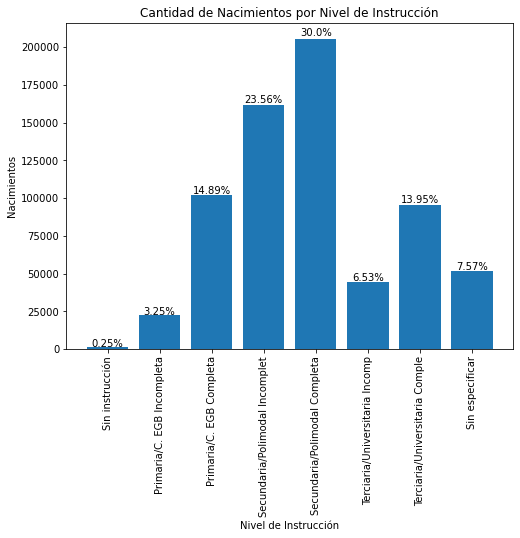

In [10]:
#Gráfico cantidad de nacimientos según nivel de instrucción:
plt.figure(figsize=(8, 6))
grafico = plt.bar(range(len(niveles_instruccion)), list(nacimientos_x_instruccion))
plt.xticks(range(len(niveles_instruccion)), niveles_instruccion, rotation='vertical')
plt.title('Cantidad de Nacimientos por Nivel de Instrucción')
plt.xlabel('Nivel de Instrucción')
plt.ylabel('Nacimientos')

#Coloco los porcentajes sobre las barras:
i = 0
for barra in grafico:
    ancho = barra.get_width()
    alto = barra.get_height()
    x, y = barra.get_xy()
    
    plt.text(x+ancho/2, y+alto*1.01, str(porcentajes_nacimientos_instruccion[i])+"%", ha='center')
    i += 1

plt.show()

### Consulta: Comparativa de nacimientos según edad de la madre para máximos y mínimos niveles educativos

In [11]:
#Agrupar según nivel de instrucción y edad y sumar los nacimientos correspondientes a cada combinación
nacimientos_instruccion_edad = df.groupby(['instruccion_de_la_madre_id', 'edad_de_la_madre_grupos_id'])['cantidad_nacimientos'].sum()

print(nacimientos_instruccion_edad)

instruccion_de_la_madre_id  edad_de_la_madre_grupos_id
1                           1                               17
                            2                              232
                            3                              391
                            4                              375
                            5                              350
                                                          ... 
8                           5                             8896
                            6                             5658
                            7                             1558
                            8                              114
                            9                             5398
Name: cantidad_nacimientos, Length: 69, dtype: int64


Creamos una función que sume los nacimientos discriminados segun edad para un nivel o rango de instrucción determinado y los devuelva en una lista ordenada. Debe recibir como parámetros los ***id*** correspondientes al mínimo y máximo niveles de instrucción que definen el rango deseado.

In [12]:
def suma_nacimientos_xedad_xinstruccion(min_instruccion, max_instruccion):
    suma_nxexi = []
    for i in range(len(grupos_etarios)):
        nacimientos = 0
        for nivel_instruccion in range(min_instruccion, max_instruccion):
            # Es necesaria la cláusula try-except ya que es posible que no existan datos para alguna
            # franja etaria determinada,correspondiente al nivel de instrucción solicitado
            try:
                nacimientos += nacimientos_instruccion_edad[nivel_instruccion][i+1]
            except KeyError:
                nacimientos += 0
        suma_nxexi.append(nacimientos)
    return suma_nxexi

Utilizando la función anterior, calculamos la sumatoria de nacimientos para rangos de *'baja'* y *'alta'* instrucción. Estos rangos los definimos de la siguiente manera:

- *Baja instrucción*: ~50% de la población con menor instrucción.
- *Alta instrucción*: ~50% de la población con mayor instrucción.

Puede observarse en la consulta de nacimientos discriminados por nivel de instrucción, cómo esta división se encuentra entre los niveles educativos *Sin Instrucción a Secundario Incompleto* como porción inferior y *Secundario Completo a Terciario Completo* como porción superior.

De todas formas, pueden consultarse los rangos deseados, manipulando los ***id*** según han sido determinados en el dataset:

Sin Instrucción (1), Primaria Incompleta (2), Primaria Completa (3), Secundaria Incompleta (4), Secundaria Completa (5), Terciario Incompleto (6), Terciario Completo (7) y Sin especificar (8).

In [13]:
#Calculo la sumatoria de nacimientos y promedios de edad para rangos de baja y alta instrucción:

#Baja instrucción: Sin instrucción (1) a Secundario Incompleto (4)
suma_nxe_instruccion_baja = suma_nacimientos_xedad_xinstruccion(1, 5)  #Valores sugeridos 'Caso extremo': (4, 5)
promedio_baja = calcula_promedio_edad(suma_nxe_instruccion_baja)

#Alta instrucción: Secundario Completo (5) a Terciario Completo (7)
suma_nxe_instruccion_alta = suma_nacimientos_xedad_xinstruccion(5, 8) #Valores sugeridos 'Caso extremo': (7, 8)
promedio_alta = calcula_promedio_edad(suma_nxe_instruccion_alta)

print(suma_nxe_instruccion_baja, promedio_baja)
print(suma_nxe_instruccion_alta, promedio_alta)

[2147, 62616, 81347, 62569, 41422, 26118, 7979, 526, 2816] [25.86, 3.67]
[0, 15732, 70978, 89133, 90361, 59733, 15329, 1287, 3445] [29.81, 4.46]


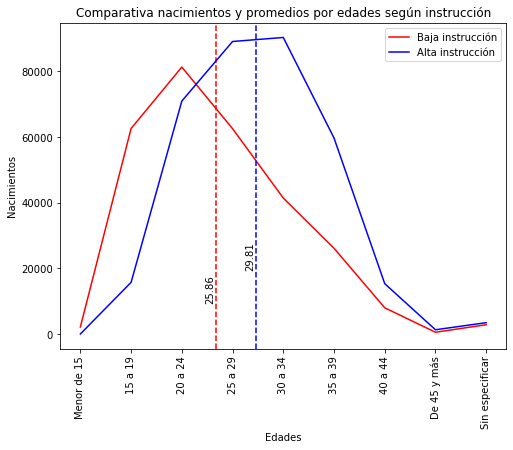

In [14]:
#Gráfico de cantidad de nacimientos según edades para baja y alta instrucción:
plt.figure(figsize=(8, 6))

#Línea Baja instrucción y promedio
plt.plot(range(len(grupos_etarios)), suma_nxe_instruccion_baja, color='r', label='Baja instrucción')
plt.axvline(promedio_baja[1]-1, color='r', linestyle='dashed')
plt.text(promedio_baja[1]-1.2, 10000, promedio_baja[0], rotation='90')

#Línea Alta instrucción y promedio
plt.axvline(promedio_alta[1]-1, color='b', linestyle='dashed')
plt.text(promedio_alta[1]-1.2, 20000, promedio_alta[0], rotation='90')
plt.plot(suma_nxe_instruccion_alta, color='b', label='Alta instrucción')

plt.xticks(range(len(grupos_etarios)), grupos_etarios, rotation='vertical')
plt.title('Comparativa nacimientos y promedios por edades según instrucción')
plt.xlabel('Edades')
plt.ylabel('Nacimientos')
plt.legend()
plt.show()

---
## RESULTADOS:


Puede observarse al discriminar los nacimientos según nivel educativo de la madre, que más del 50% de los mismos se hayan concentrados entre las categorías *'Secundario Incompleto'* y *'Secundario Completo'*. Se observa también una pronunciada caída de los nacimientos para las categorías de educacion superior *'Terciaria'*. Las causas de esto podrían ser múltiples, entre las que encontraríamos la edad de la madre y las dificultades de encarar este tipo de estudios en conjunción a las exigencias familiares.

Otra división notoria es la que se da entre lo que podemos denominar *'Alto'* y *'Bajo'* nivel educativo. Los niveles educativos inferiores (*'Sin Instrucción', 'Primaria Incompleta', 'Primaria Completa' y 'Secundaria Incompleta'*) comprenden aproximadamente el 50% de los datos mientras que la otra porción queda para los niveles educativos superiores (*'Secundaria Completa', 'Terciario Incompleto' y 'Terciario Completo'*)

Al hacer la comparación de la distribución de las edades para los nacimientos entre alto y bajo nivel educativo, se observan picos más tempranos de maternidad a menor educación, con un promedio de edad de **25.9** años, en contraste a los picos más tardíos de maternidad para los niveles de instrucción altos, con un promedio de edad de la madre que ronda los **29.9** años.

El caso más extremo se da entre los niveles educativos *'Secundario Incompleto'* y *'Terciario Completo'* con unos promedios de edad de **24.8** y **33.3** años respectivamente.

---
## CONCLUSIONES: